# 2D Ising Model on an L sided square crystal  

## Preamble

Consider the following expression:

\begin{align}
\langle O\rangle_{n+1} = \langle O\rangle_{n} + \frac{1}{n+1}\Bigl(O\bigl(\{s_i\}_{n+1}\bigr) - \langle O\rangle_{n}\Bigr),
\end{align}

This expression can be simplified to be:

\begin{align}
\langle O\rangle_{n+1} = \frac{1}{n+1}\Bigl(O\bigl(\{s_i\}_{n+1}\bigr) +n\langle O\rangle_{n}\Bigr)
\end{align}

Consider $T_c = 2.2692$

In [ ]:
import proj_3_module as proj3
import numpy as np
import random as rd
import matplotlib.pyplot as plt



We check for similar results as the ones shown in the project 3 workbook:

In [ ]:
latt1 = proj3.two_dim_ising(100,0.7*2.2692)[0]
latt2= proj3.two_dim_ising(100,2.2692)[0]
latt3= proj3.two_dim_ising(100,1.8*2.2692)[0]

#, U1, M1, num1, t1, xi1, Ch1


# blue is -1, white is 1

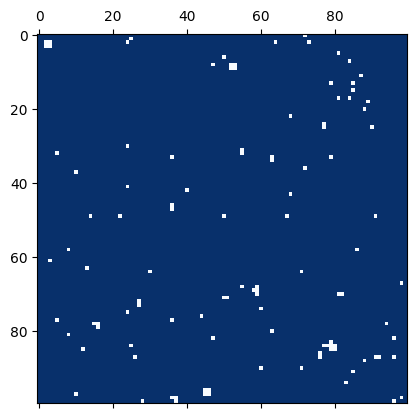

In [ ]:
fig, ax = plt.subplots()
ax.matshow(latt1, cmap=plt.cm.Blues)



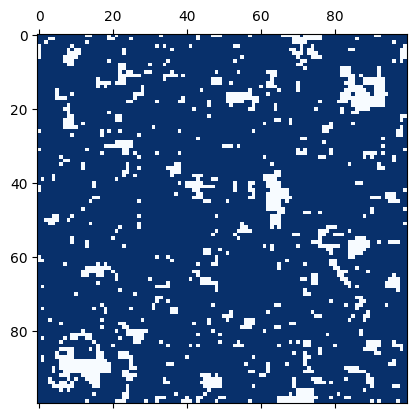

In [ ]:

fig, ax = plt.subplots()
ax.matshow(latt2, cmap=plt.cm.Blues)


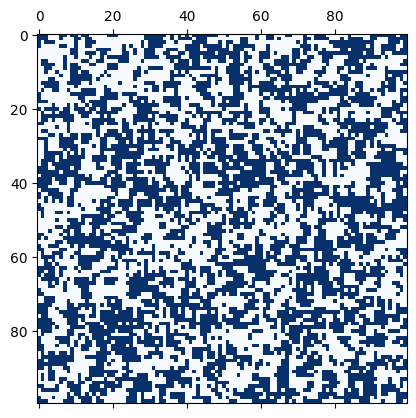

In [ ]:
fig, ax = plt.subplots()
ax.matshow(latt3, cmap=plt.cm.Blues)

We choose sizes $L = 16, 32$ for the

---

lattice given $T = 5$:

### L = 16

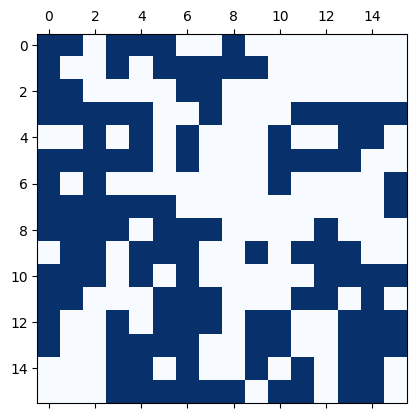

In [ ]:
latt = proj3.two_dim_ising(16,5)[0]


fig, ax = plt.subplots()
ax.matshow(latt, cmap=plt.cm.Blues)


# blue is -1, white is 1

In [ ]:
L = 16
t = 5
T = [i/(L**2) for i in range(10,280,2)]
M = [proj3.two_dim_ising(L,t, n = i)[2] for i in range(10,280,2)]
U = [proj3.two_dim_ising(L,t, n = i)[1] for i in range(10,280,2)]

Text(0, 0.5, 'M')

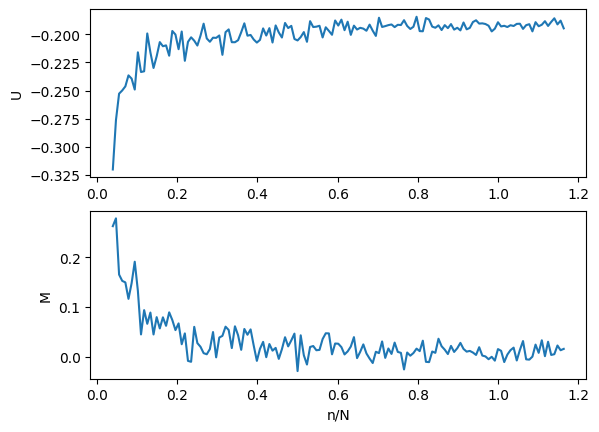

In [ ]:
fig, ax = plt.subplots(2)
ax[0].plot(T,U)
ax[0].set_ylabel('U')
ax[1].plot(T,M)

# ax[0].set_ylim([-2, -1.7])
ax[1].set_xlabel("n/N")
ax[1].set_ylabel('M')
# ax[1].set_ylim([0.96, 1.02])

### L = 32

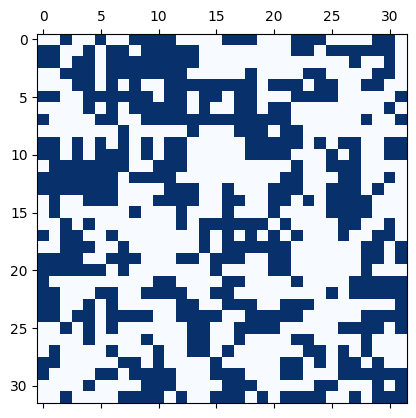

In [ ]:
latt2, U2, M2, num2, sS2, xi2, Ch2 = proj3.two_dim_ising(32,5)

fig, ax = plt.subplots()
ax.matshow(latt2, cmap=plt.cm.Blues)

In [ ]:
L = 32
t = 5

T = [i/(L**2) for i in range(10,280,2)]
M = [proj3.two_dim_ising(L,t, n = i)[2] for i in range(10,280,2)]



Text(0, 0.5, 'M')

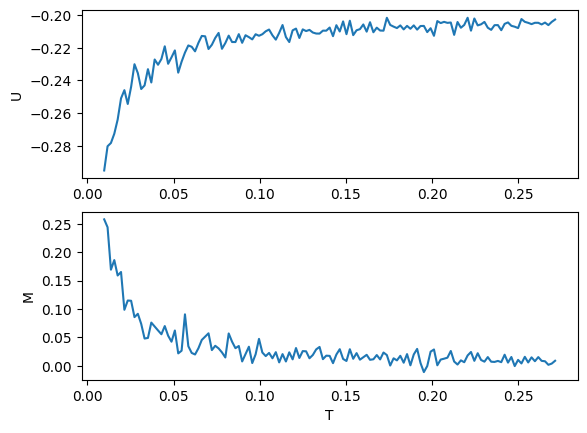

In [ ]:
fig, ax = plt.subplots(1)


# ax[0].set_ylim([-2, -1.7])
ax[0].set_xlabel("T")
ax[0].set_ylabel('M')
ax[0].axvline(x = 2.2692, color = 'red')
# ax[1].set_ylim([0.96, 1.02])

We observe convergence for $ t\geq 0.15$ for $L = 32$ and $t \geq 0.6$ for $L = 16$. Also, for both $L = 16$ and $L = 32$ we obtain the same curve, with the same values for $U$ and $M$. So the size of the array does not seem to impact the results for $U,\ M$ when varying for time. This can be interpreted as the computer sucessfully simulating the system going to thermal equilibrium.

## Magnetization as a function of lattice size

We code and plot the onsager solution for $M(T)$ with $T_c$ previously defined:

In [ ]:
def onsager(T,Tc):
  if T >=Tc:
    return 0
  else:
    return (1-np.sinh(2/T)**(-4))**(1/8)


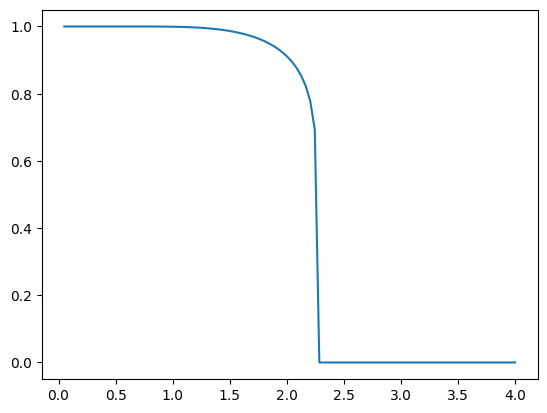

In [ ]:
x = np.linspace(4,0.01,100)
y = [onsager(i,2.2692) for i in x]

plt.plot(x,y)

Now we approximate $M(T)$ for $L \in \{8,16,32,64\}$ using our previous work:

In [ ]:
L = [8,16,32,64]
M0 = [proj3.two_dim_ising(L[0],temp = i, n = 250)[2] for i in x]
M1 = [proj3.two_dim_ising(L[1],temp = i, n = 250)[2] for i in x]
M2 = [proj3.two_dim_ising(L[2],temp = i, n = 250)[2] for i in x]
M3 = [proj3.two_dim_ising(L[3],temp = i, n = 250)[2] for i in x]

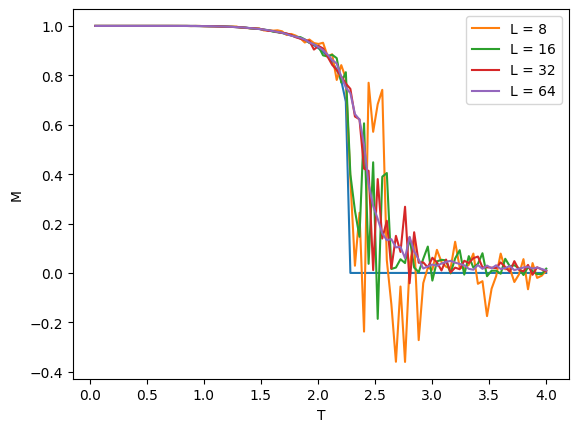

In [ ]:
plt.plot(x,y)
plt.plot(x, M0, label = "L = " + str(L[0]))
plt.plot(x,M1, label = "L = " + str(L[1]))
plt.plot(x,M2, label = "L = " + str(L[2]))
plt.plot(x,M3, label = "L = " + str(L[3]))

plt.xlabel("T")
plt.ylabel("M")

plt.legend()
plt.show()

Paying close attention to the graph we can observe the fact that in this instance, L has an effect on the resuls for the approximation of $M(T)$. Namely due to the fact that for bigger M, there is a better fit for the theoretical curve i.e. it converges in a cleaner way.

# Behavior of the lattice for big L

We now repeat the process done in the beginning using $L = 256,\ T \in \{1.8,2.3,4\}$

In [ ]:
latt1 = proj3.two_dim_ising(256,1.8)[0]
latt2= proj3.two_dim_ising(256,2.3)[0]
latt3= proj3.two_dim_ising(256,4)[0]

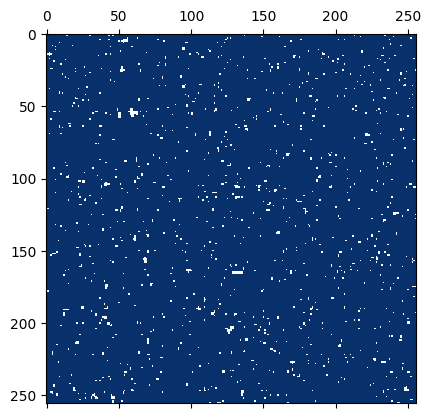

In [ ]:
fig, ax = plt.subplots()
ax.matshow(latt1, cmap=plt.cm.Blues)

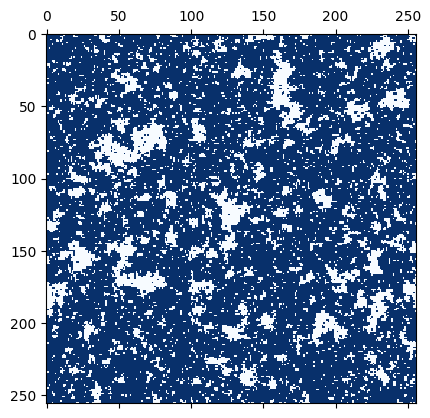

In [ ]:
fig, ax = plt.subplots()
ax.matshow(latt2, cmap=plt.cm.Blues)

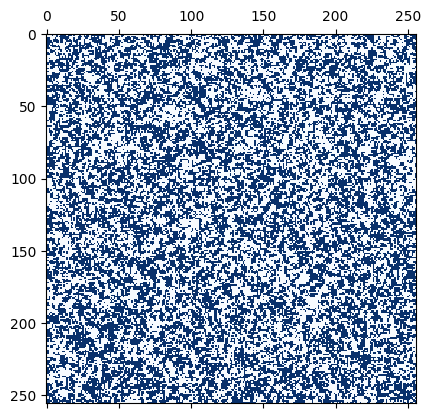

In [ ]:
fig, ax = plt.subplots()
ax.matshow(latt3, cmap=plt.cm.Blues)

The results, once again, are consistent with what we might expect from the literature given to us. They also indicate a profound relationship present in the way we can physically interpret temperature for magnetization.

For the increasing values of temperature, we can observe that the distribution of spins is more homogeneous in the lattice. Now, we know that the initial state assumes all the lattice members have the same spin. Now, once we let the system enter equilibrium in a certain temperature, some spins randomly change, powered by the energy given by the temperature increase. They in some way want to change its value, so as we increase temperature, we increase the chance of the individual spins to change its values, influenced bu its neighbors (in this case its four closest neighbors in the lattice). For low temperatures, whay happens is that the system is barely able to modify the initial state, so it stays more or less the same way. For values near criticality, what we get are pockets of spin changes, but at higher temperatures, the net spin is closer to zero, and the spin values are more uniformly dispersed. So near criticality, we can find some local regions of spin change that don't seem to spread to the entire lattice. So, for this case, the behavior of the lattice suggests that the equilibrium state keeps a non zero magnetization, and coexistence between the lattice changing and not changing spin, suggesting some sort of transition state between complete and null magnetization.